In [1]:
import os, shutil
original_dataset_dir = 'D:/owais/dogs-vs-cats'
base_dir = 'D:/owais/dogs-vs-cats_small'
os.mkdir(base_dir)
original_dataset_dir = 'D:/owais/dogs-vs-cats/train/train'
base_dir = 'D:/owais/dogs-vs-cats_small'
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W1006 02:09:59.381744  7028 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1006 02:09:59.719038  7028 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1006 02:09:59.876615  7028 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1006 02:10:00.068255  7028 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])    

W1006 02:10:00.510680  7028 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1006 02:10:00.554926  7028 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1006 02:10:00.566672  7028 deprecation.py:323] From C:\Users\asus\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
validation_data=validation_generator,validation_steps=50)

W1006 02:10:02.557535  7028 deprecation_wrapper.py:119] From C:\Users\asus\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
100/100 [==============================] - 286s 3s/step - loss: 0.6888 - acc: 0.5440 - val_loss: 0.6662 - val_acc: 0.6150
Epoch 2/100
100/100 [==============================] - 275s 3s/step - loss: 0.6552 - acc: 0.6035 - val_loss: 0.6348 - val_acc: 0.6400
Epoch 3/100
100/100 [==============================] - 276s 3s/step - loss: 0.6034 - acc: 0.6725 - val_loss: 0.6056 - val_acc: 0.6530
Epoch 4/100
100/100 [==============================] - 277s 3s/step - loss: 0.5641 - acc: 0.7035 - val_loss: 0.5898 - val_acc: 0.6810
Epoch 5/100
100/100 [==============================] - 278s 3s/step - loss: 0.5400 - acc: 0.7165 - val_loss: 0.5818 - val_acc: 0.6830
Epoch 6/100
100/100 [==============================] - 275s 3s/step - loss: 0.5084 - acc: 0.7495 - val_loss: 0.5757 - val_acc: 0.6900
Epoch 7/100
100/100 [==============================] - 275s 3s/step - loss: 0.4905 - acc: 0.7690 - val_loss: 0.5729 - val_acc: 0.6990
Epoch 8/100
100/100 [==============================] - 277s 3s

Epoch 62/100
100/100 [==============================] - 281s 3s/step - loss: 0.0053 - acc: 0.9985 - val_loss: 1.8570 - val_acc: 0.7170
Epoch 63/100
100/100 [==============================] - 281s 3s/step - loss: 0.0034 - acc: 0.9985 - val_loss: 1.8408 - val_acc: 0.7320
Epoch 64/100
100/100 [==============================] - 281s 3s/step - loss: 0.0079 - acc: 0.9975 - val_loss: 1.9101 - val_acc: 0.7270
Epoch 65/100
100/100 [==============================] - 281s 3s/step - loss: 0.0108 - acc: 0.9970 - val_loss: 1.8833 - val_acc: 0.7270
Epoch 66/100
100/100 [==============================] - 281s 3s/step - loss: 0.0079 - acc: 0.9975 - val_loss: 1.8087 - val_acc: 0.7230
Epoch 67/100
100/100 [==============================] - 281s 3s/step - loss: 0.0102 - acc: 0.9975 - val_loss: 1.8304 - val_acc: 0.7260
Epoch 68/100
100/100 [==============================] - 281s 3s/step - loss: 0.0092 - acc: 0.9975 - val_loss: 1.9026 - val_acc: 0.7250
Epoch 69/100
100/100 [==============================] -

In [13]:
model.save('cats_and_dogs_small_1.h5')

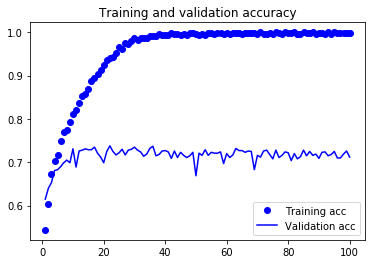

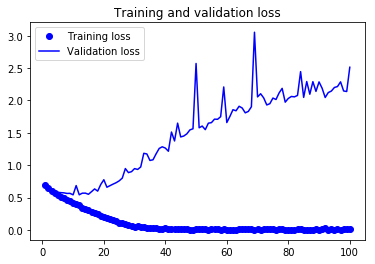

In [10]:
    import matplotlib.pyplot as plt
    %matplotlib inline
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [14]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [12]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
if i % 4 == 0:
    break
    


SyntaxError: 'break' outside loop (<ipython-input-12-a48be8700d1a>, line 17)

In [15]:
import pandas as pd
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'history.csv'

with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [16]:
pwd

'C:\\Users\\asus'